# Partial Differential Equations of Groundwater Flow

---

## How to interpret the equations

If you are mathematically minded, then the groundwater flow equation by itself give you a really good feel for how the fluid works. You recognise a _diffusion equation_ and understand that it naturally comes about from a problem where the flux in some quantity is proportional to the gradient of this quantity. _(In this case, mass or volume flux is proportional to the pressure gradient. In the case of thermal diffusion, the heat flux is proportional to the temperature gradient)._  You also understand how the problem becomes more complicated when the material properties vary from place to place. 

For the less mathematically minded, remember that the Laplace equation above is the result of writing the rate of change of the pressure as a gradient of the flux. 

$$ S \frac{\partial h}{\partial t} + H = -\frac{\partial }{\partial x} 
            \underbrace{\left( - K \frac{\partial h}{\partial x} \right)}_\text{flux} $$
                        
Here is a simple picture to help you visualise why the gradient of the flux controls the build up of pressure _(or temperature)_: the level of fluid builds up if the rate at which fluid enters the volume (_the mass flux_), \\(q_i\\), is larger than the rate at which fluid leaves the volume, \\(q_o\\). The values of the fluxes top / bottom in this case are only different if there is a gradient in the flux (a difference between the values at two points !). The greater the difference, the faster the pressure in the volume will change.

<img src="images/BucketFlux.png" alt="Bucket" width="250">

If the fluxes don't change, then change of the level, \\(\Delta h\\) in this bucket over some interval, \\(\Delta t\\),  is just proportional to the difference between the flux out and the flux in. 

$$  \;\;\; \frac{\Delta h}{\Delta t} \propto q_o - q_i  $$

## Extension to 2D and 3D

The flux is a vector quantity (the flow has a specific direction), so in 2D and 3D problems, we have a **vector** balance of the flux in / out of the local volume in each direction. 


$$ S \frac{\partial h}{\partial t} + H = -\frac{\partial }{\partial x} 
              \underbrace{\left( - K \frac{\partial h}{\partial x} \right)}_\textrm{x flux}
              -\frac{\partial }{\partial y}
              \left( - K \frac{\partial h}{\partial y} \right) 
               -\frac{\partial }{\partial z}
              \left( - K \frac{\partial h}{\partial z} \right) 
 $$
 
Which simplifies to 
 
$$  S\frac{\partial h}{\partial t} + H = 
    K \left( \frac{\partial^2 h}{\partial x^2} + \frac{\partial^2 h}{\partial y^2} + \frac{\partial^2 h}{\partial z^2} \right) \textit{ $\longrightarrow$ (3D, isotropic groundwater flow equation)}$$

\\( K \\) may not be isotropic — it can vary with direction. In fact this is often the case because the crust is formed under the influence of gravity which introduces layers and preferential directions for faults / joints. Under these circumstances, we have a **tensor** valued coefficient. Let's worry about that another time.

## Finite Differences

Still working backwards !!

In deriving the equations above, we always think about a small volume of material, and we imagine it shrinking to an infinitessimal size. This gives us the differential equations which relate changes in some quantity to its gradients in the spatial directions and in time. 

_What if we don't shrink the little boxes to an infinitessimal size ?_  

In that case, we get an approximate version of what would happen in the real world because we are only looking at the gradients in a few places and averaging their effects over the whole of each box. If we choose just a few boxes, then we get a very rough approximation !

Look at this picture in which we pick a small number of discrete points in a line and draw boxes around each one (boxes that touch each other). 

<img src="images/BlockFlux.png" height=160px>

$$  S \frac{\partial h}{\partial t} + H = -\frac{\partial }{\partial x} 
            \underbrace{\left( - K \frac{\partial h}{\partial x} \right)}_{q}
$$

$$  S \frac{\Delta h}{\Delta t} = - K \frac{\Delta q}{\Delta x}
\textit{$\longrightarrow$ ( approximate rate of change )}
$$

$$  q = \frac{\Delta h}{\Delta x} \textit{$\longrightarrow$ ( approximate flux )} $$

We use \\(\Delta \\) here to indicate that we are not going to shrink the lengths to find the infinitessimal limit, but are going to leave the boxes at a finite size. If we have some initial values of \\(h\\) at the start of the calculation, we can calculate approximate fluxes on each of the vertical planes from the expression above. That means we can compute the approximate change in \\(h\\) with time at each of the point in the diagram. 

We can only calculate the changes at this finite set of points, but, if we have write this into a simple computer program, we can calculate this at an awful lot of points. Let's see if it works !

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

'''
    This is a function to calculate the gradient at a point in a long line
    of points. You feed it coordinates (X), values (H) and - optional - 
    boundary conditions. It returns the gradient.
'''

def gradx(X, H, leftbc=None, rightbc=None):
  
    size = len(H)    
    gradP = numpy.zeros(size)

    gradP[0] = (H[1] - H[0]) / ( X[1] - X[0] )
    gradP[-1] = (H[-1] - H[-2]) / (X[-1] - X[-2])

    if leftbc != None:
        gradP[0] = leftbc
        
    if rightbc != None:
        gradP[-1] = rightbc 
        
    for i in range (1, size-1):
        gradP[i] = (H[i+1] - H[i-1]) / ( X[i+1] - X[i-1] )
            
    return gradP

Populating the interactive namespace from numpy and matplotlib


Let's set up a bunch of points for $P_i$ from the diagram we sketched earlier. We start making this $\sin(x)$ since we know that the derivative should be $\cos(x)$ and so we can easily check how well it works.

<img src="images/BlockFlux.png" height=160px>

In [2]:
import numpy

xP = numpy.linspace(0,2.0*numpy.pi,100)
hP = numpy.sin(xP)
gradx_hP = gradx(xP,hP)

pass

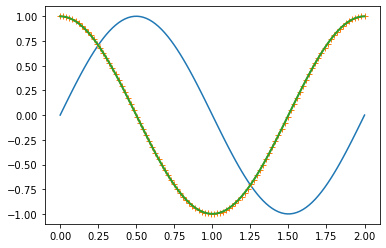

In [3]:
plot(xP / numpy.pi, hP)
plot(xP / numpy.pi, numpy.cos(xP), marker='+')
plot(xP / numpy.pi, gradx_hP, linewidth=2)

In [4]:
hP2 = numpy.sin(xP) + 0.1 * numpy.sin(xP*3.0)
gradx_hP2 = gradx(xP,hP2) 

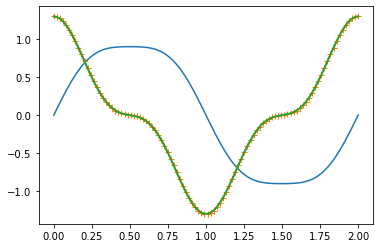

In [5]:
plot(xP / math.pi, hP2)
plot(xP / math.pi, numpy.cos(xP) + 0.3 * numpy.cos(xP*3.0), marker='+')
plot(xP / math.pi, gradx_hP2, linewidth=2)

How about the second derivative, since we are dealing with a diffusion equation ?

In [6]:
# The rate of change with time is proportional to the gradient of the gradient !

grad2x_hP = gradx(xP,gradx_hP)
grad2x_hP2 = gradx(xP,gradx_hP2)

Text(0.5, 1.0, 'Error')

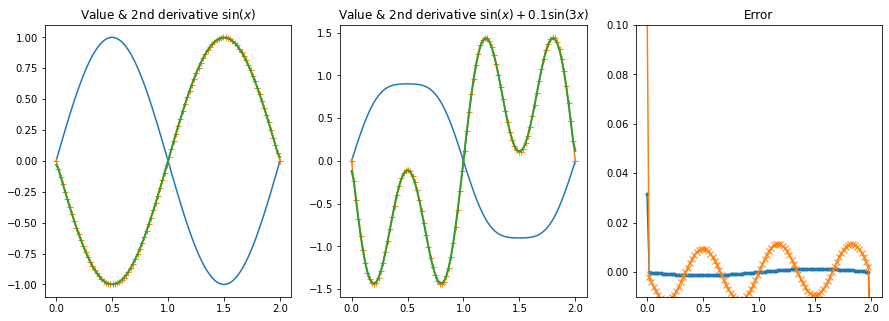

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)
f.set_size_inches(15,5)

ax1.plot(xP / math.pi, hP)
ax1.plot(xP / math.pi, -numpy.sin(xP), marker='+')
ax1.plot(xP / math.pi, grad2x_hP, linewidth=2)
ax1.set_title( "Value & 2nd derivative $\sin(x)$")

ax2.plot(xP / math.pi, hP2)
ax2.plot(xP / math.pi, -numpy.sin(xP) - 0.9 * numpy.sin(xP*3.0), marker='+')
ax2.plot(xP / math.pi, grad2x_hP2, linewidth=2)
ax2.set_title( "Value & 2nd derivative $\sin(x) + 0.1 \sin(3x)$")

ax3.plot(xP / math.pi, -numpy.sin(xP) - grad2x_hP, marker=".")
ax3.plot(xP / math.pi, -numpy.sin(xP) - 0.9 * numpy.sin(xP*3.0) - grad2x_hP2, marker="x")
ax3.set_ylim(-0.01, 0.1) 
ax3.set_title( "Error")

So, it seems we can calculate reasonably accurate gradients with our little-boxes approximation. We can now try to solve the time-evolution of the pressure with the same function and see what happens. 

**Note:** In the previous plots, errors are less than 1% in the second derivative away from the boundary but nearer 5% there. On the other hand, we haven't even tried to do a clever job of building the interpolation / derivatives.

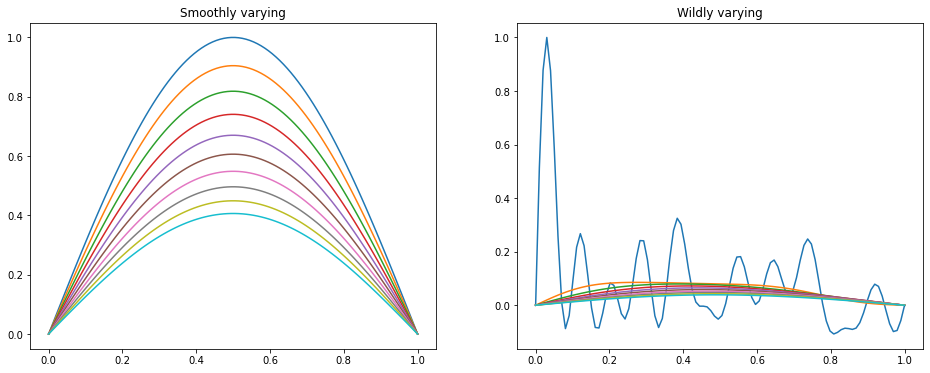

In [8]:
xP = linspace(0,math.pi,100)
hP = numpy.sin(xP)
hP2 = zeros(len(xP))

# random initial wavelengths

for k in range(1,25):
    hP2 = hP2 + numpy.random.rand() * numpy.sin(xP * float(k)) 

hP2 = hP2 / max(hP2)    
    
gradx_hP = gradx(xP,hP)
gradx_hP2 = gradx(xP,hP2)
grad2x_hP = gradx(xP,gradx_hP)
grad2x_hP2 = gradx(xP,gradx_hP2)    

deltat = 0.002

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.set_size_inches(16,6)
ax1.set_title( "Smoothly varying")
ax2.set_title( "Wildly varying")

## Timestepping loop 

for time in range(0,500):
    if(time%50==0):    
        ax1.plot(xP / math.pi,hP)
        ax2.plot(xP / math.pi,hP2)

    hP = hP + deltat * grad2x_hP
    hP2 = hP2 + deltat * grad2x_hP2
    
    # Boundary conditions
    
    hP[0] = hP[-1] = 0.0
    hP2[0] = hP2[-1] = 0.0

    # compute new gradients    
    gradx_hP = gradx(xP,hP)
    gradx_hP2 = gradx(xP,hP2)
    grad2x_hP = gradx(xP,gradx_hP)
    grad2x_hP2 = gradx(xP,gradx_hP2)    

We can start to obtain results which are clearly "right" in the sense that they evolve quantitatively the way the solutions are supposed to. They act like diffusion solutions – smoothing rapidly fluctuating (short wavelength) regions quickly.

### Harder problems

What about if we let \\(K\\) vary in space ?  We can guess how this will influence the solution, but we can also try it out. 

**Note** in the solution below, we can also see how sensitive the answer can be to _getting the numerical representation correct._ Although this is a specialised topic, I would like you to see that these results  always need to be tested against any analytic solutions you can find as it is very easy to calculate a lot of nonsense !

_Try changing \\(\Delta t\\) and then \\(\Delta x\\)_ – is that what you expected ?

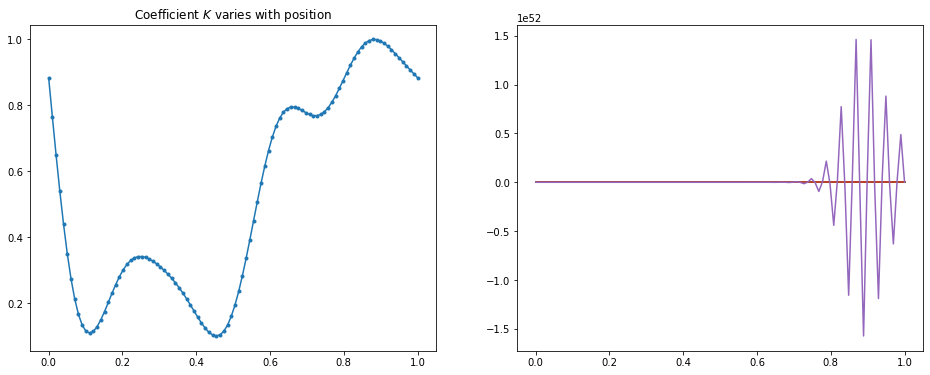

In [9]:
# delta x = 1/100 ... also try 1/250 

xP = linspace(0,math.pi,100)  

# Check out what happens if you change this value from 0.0020 to 0.0025
deltat = 0.0025

hP = numpy.sin(xP)
K = zeros(len(xP))

# random initial wavelengths

for k in range(1,10,1):
    K = K + numpy.random.rand() * numpy.sin(xP * float(k)) / k

K = K - min(K)
K = 1.0 - 0.9 * K / max(K)  

gradx_hP = gradx(xP,hP)
grad2x_hP = gradx(xP,gradx_hP*K)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.set_size_inches(16,6)

ax1.plot(xP / math.pi, K, marker=".")
ax1.set_title( "Coefficient $K$ varies with position")

## Timestepping loop 

for time in range(0,500):
    hP = hP + deltat * grad2x_hP
    hP2 = hP2 + deltat * grad2x_hP2    

    # Boundary conditions   
    hP[0] = hP[-1] = 0.0

    # compute new gradients    
    gradx_hP = gradx(xP,hP)
    grad2x_hP = gradx(xP,gradx_hP*K)
      
    if(time%100==0):    
        ax2.plot(xP / math.pi,hP)